# Dot Density Plots

In [1]:
import geopandas as gpd
import mapped
mapped.__version__

'19.12.0'

In [2]:
gdf = gpd.read_file(gpd.datasets.get_path('nybb'))

gdf['Population'] = [
    479_458, 
    2_358_582,
    2_648_771,
    1_664_727,
    1_471_160,
]

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,Population
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...,479458
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...,2358582
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...,2648771
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...,1664727
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...,1471160


The `dotdensity` method is patched into the `GeoDataFrame` class.  It lets you
generate a new GeoSeries of points in each polygon in proportion to some
attribute in the original GeoDataFrame.

In [3]:
dots = gdf.dotdensity('Population', units_per_point=1e4)

In [4]:
dots.head()

0  0    POINT (926591.7322433983 139403.6036635698)
   1    POINT (931420.9367935221 148380.6885785985)
   2    POINT (945487.5450723831 167904.0144266054)
   3     POINT (924059.0688579746 134740.859988616)
   4    POINT (959353.1182804964 147064.2814910771)
Name: geometry, dtype: object

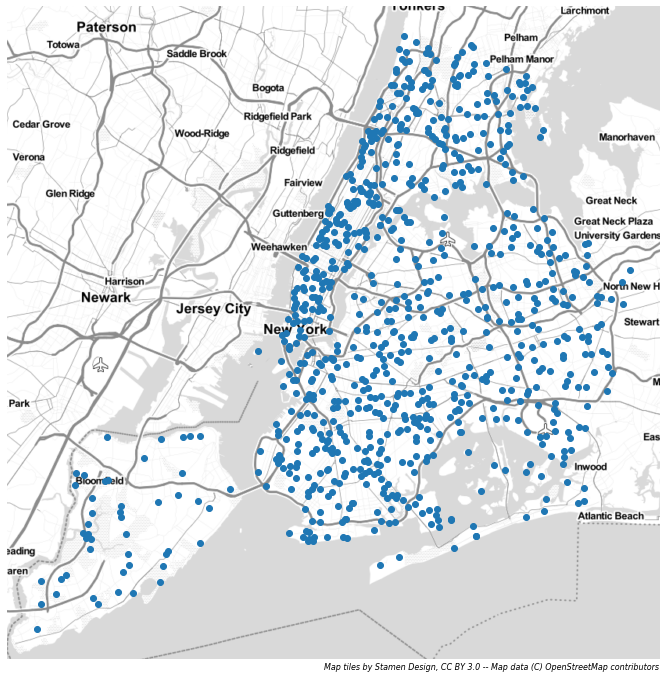

In [5]:
dots.plot(basemap="Stamen.TonerLite", figsize=(12,12));